# **Assignment-5**
 - Chinta Sai Venkatesh
 - 21BAI10052
 - VIT Bhopal

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore',category=UserWarning)

## **Dataset**
**Downloaded from link** - <a href="https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data">```Dataset Link```</a><br>
**and saved as *```Mall_Customers.csv```***

In [2]:
df = pd.read_csv("./Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## **Understanding the dataset**

In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
len(df['CustomerID'].unique())

200

In [7]:
df.drop('CustomerID',axis=1,inplace=True)

In [8]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

C:\Users\Sai venkatesh\AppData\Local\Temp\ipykernel_3008\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

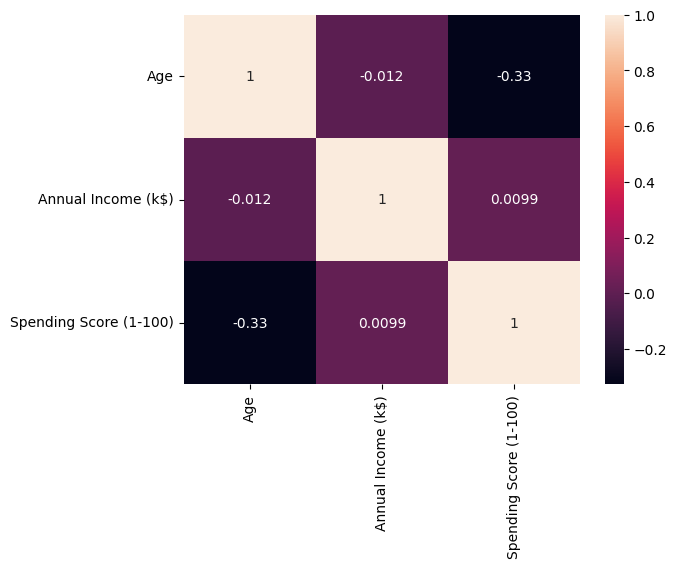

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## **Data Visualisation**

<AxesSubplot: xlabel='Age', ylabel='Density'>

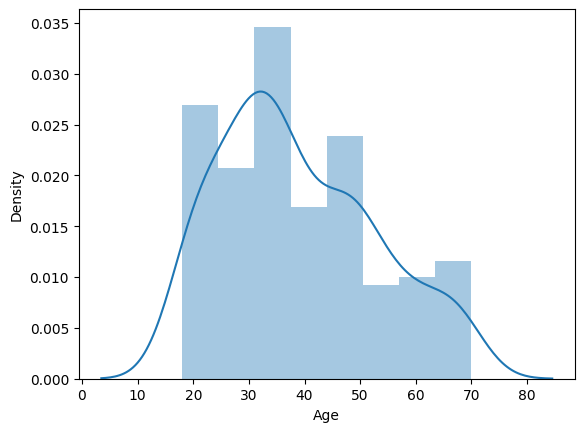

In [12]:
sns.distplot(df['Age'])

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Density'>

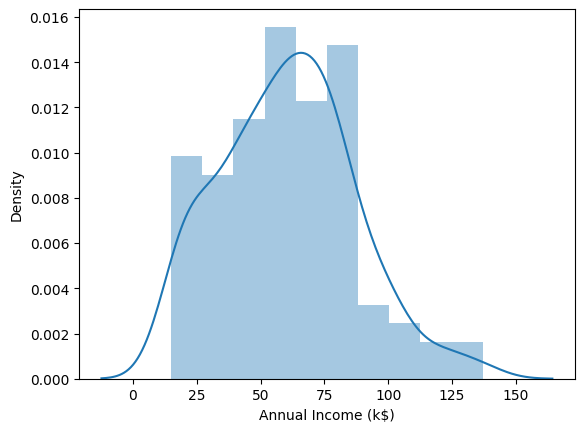

In [13]:
sns.distplot(df['Annual Income (k$)'])

<AxesSubplot: xlabel='Spending Score (1-100)', ylabel='Density'>

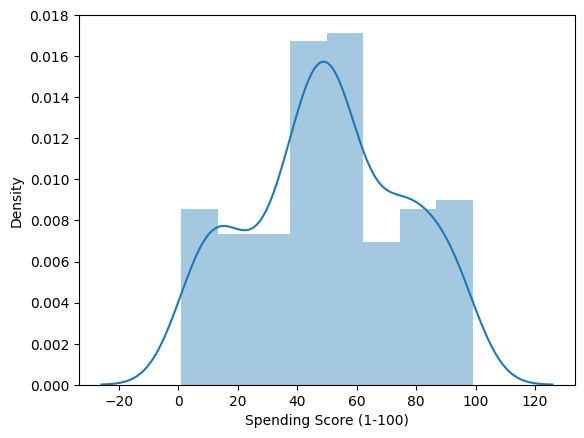

In [14]:
sns.distplot(df['Spending Score (1-100)'])

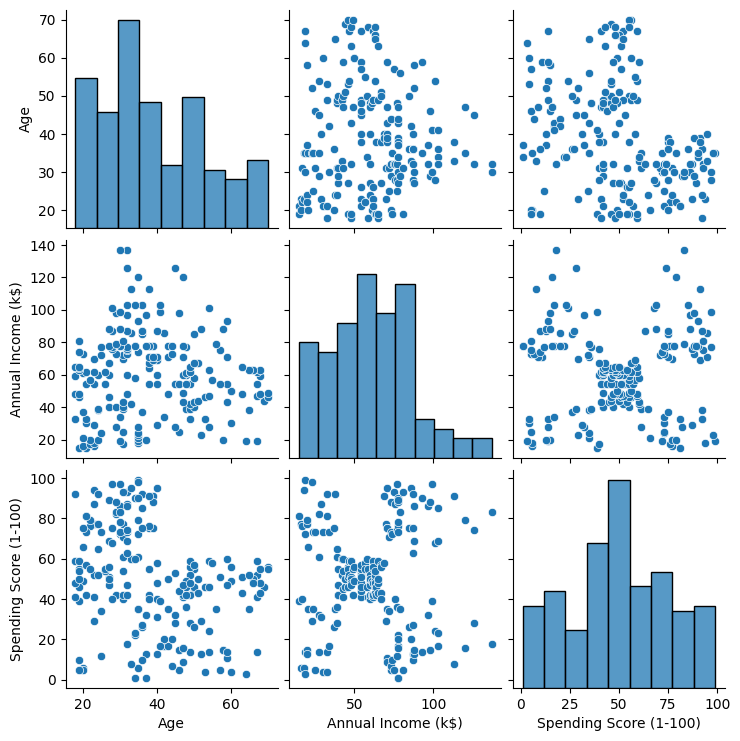

In [15]:
sns.pairplot(df)

## **Data Preprocessing**

In [16]:
new_df = df.iloc[:,1:]
new_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
new_df = pd.DataFrame(scaler.fit_transform(new_df),columns=new_df.columns)
new_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


## **Machine Learning using Clustering**

In [19]:
from sklearn import cluster

In [20]:
error = []
for i in range(1,11):
    kmeans = cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(new_df)
    error.append(kmeans.inertia_)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

In [21]:
error

[37.401482160359436,
 22.560774882609753,
 17.370109472896694,
 12.650287676229912,
 10.303964892534122,
 8.3925544810943,
 7.140215433035231,
 6.267041825215468,
 5.504539750925107,
 5.04537436785742]

### **Finding the best cluster using Elbow method**

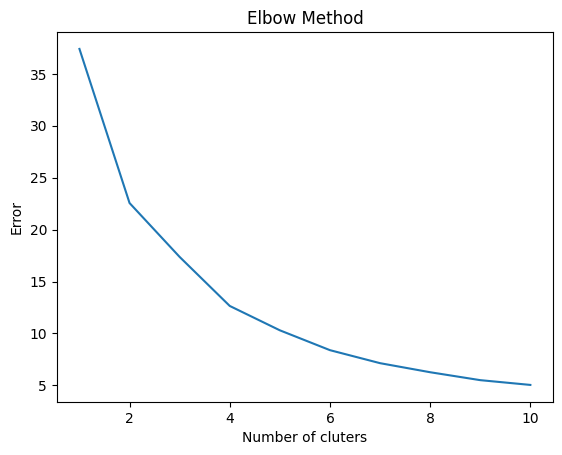

In [22]:
plt.plot(range(1,11),error)
plt.title("Elbow Method")
plt.xlabel("Number of cluters")
plt.ylabel("Error")
plt.show()

In [23]:
km_model = cluster.KMeans(n_clusters=4,init='k-means++',random_state=0)

In [24]:
km_model.fit(new_df)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [25]:
pred = km_model.predict(new_df)
pred

array([3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 2, 3, 3, 3, 1, 1, 1, 1, 3, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

## **Predict using random values**

In [26]:
km_model.predict(scaler.transform([[19,17,40]]))

array([3])

In [27]:
km_model.predict(scaler.transform([[15,5,6.5]]))

array([3])

## **Visualising the Clusters**

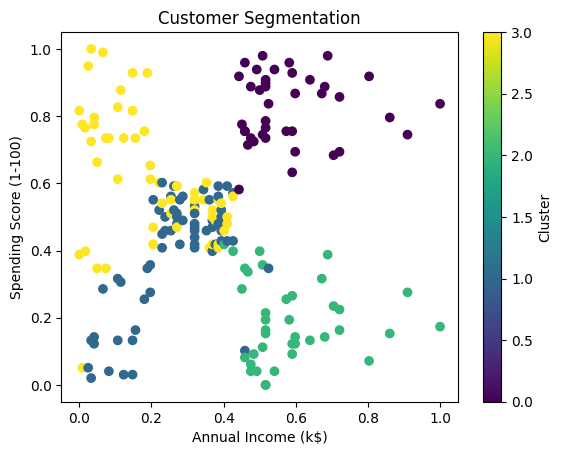

In [28]:
plt.scatter(new_df['Annual Income (k$)'],new_df['Spending Score (1-100)'],c=pred,cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.colorbar(label='Cluster')
plt.show()

In [29]:
km_model.cluster_centers_

array([[0.28605769, 0.58278689, 0.82168367],
       [0.69201183, 0.26809584, 0.39764521],
       [0.41093117, 0.58606557, 0.1895811 ],
       [0.14304993, 0.20491803, 0.60508414]])